# Triangle Hat interactive pattern by Terri Oda

> Triangle hat, triangle hat, triangle hat fights particle hat. They have a fight, triangle wins. Triangle hat.
> -- [With apologies to They Might Be Giants](https://www.youtube.com/watch?v=sNT8SMlqLJA)

This is a [simple colourwork hat originally published on curiousity.ca](https://curiousity.ca/2016/triangle-hat/).  I originally wrote it in one size with instructions for converting it yourself, so it seemed like a great thing to be an interactive pattern in pyKnit.

![Triangle Hat](TriangleHat.jpg)

*Triangle Hat Knit in 4 colours*

In [1]:
import pyknit

# Set gauge
# original gauge was 21 stitches per 4 inches and didn't specify row gauge because it used measurements instead of row numbers
# re-measuring the hat gets me...

gauge = pyknit.GaugeSwatch(row_count=52, row_measure=4, stitch_count=21, stitch_measure=4, units="in")

In [2]:
# My head is around 22 inches and I don't like my hats super tight so let's start with that

cast_on_estimate = gauge.measurement_to_stitches(22)
print(f"Cast on estimate for my desired size: {cast_on_estimate}")

Cast on estimate for my desired size: 116


In [3]:
# the chart in this hat is 8 stitches wide, so what's the closest I can get with an 8 stitch repeat?

number_of_repeats = round(cast_on_estimate / 8)
print(f"Number of chart repeats {number_of_repeats}")

Number of chart repeats 14


In [4]:
# So I need to cast on this many stitches ...

cast_on = number_of_repeats*8

instructions = []
instructions.append(f"Cast on {cast_on} stitches")
print(instructions[0])

Cast on 112 stitches


In [5]:
# Let's just double-check that we like that size.  You can tweak it by adding or removing a repeat above
# Typically, you want a hat to be a little bit tight (have negative ease) so that it will stretch and stay on

hat_circumference = gauge.stitches_to_measurement(112)
print(f"Final hat circumference: {hat_circumference}{gauge.units}")

Final hat circumference: 21.333333333333332in


In [6]:
brim_instructions = "{k2 through the back loop, p2} repeat around"
# we want around 1 inch of brim
brim_rows = gauge.measurement_to_rows(1)
instructions.append("Brim:")
instructions.append(f"Rows 1-{brim_rows}: {brim_instructions} ({int(cast_on/4)} repeats total)")

In [7]:
from ipywidgets import ColorPicker, VBox

main_color = ColorPicker(value="#616161", description="Main color")
a_color = ColorPicker(value="#dcd618", description="Color A")
b_color = ColorPicker(value="#66ccff", description="Color B")
c_color = ColorPicker(value="#db7575", description="Color C")
VBox((main_color, a_color, b_color, c_color))

In [8]:
# create a stitch legend for when we get to charts
stitch_legend = {
    "k": {
        "instruction": "knit with main colour",
        "symbol": main_color.value,
        "width": 1,
    },
    "p": {
        "instruction": "purl with main colour",
        "symbol": "-",
        "width": 1,
    },
    "k2tog": {
        "instruction": "knit two together (decrease)",
        "symbol": "/",
        "width": 1,
    },
    # Colours
    "a": {
        "instruction": "knit with colour A",
        "symbol":a_color.value,
        "width": 1,
    },
    "b": {
        "instruction": "knit with colour B",
        "symbol": b_color.value,
        "width": 1,
    },
    "c": {
        "instruction": "knit with colour C",
        "symbol": c_color.value,
        "width": 1,
    },

}

In [9]:
row = brim_rows+1
colourwork_instructions = [
    f"Rows {row}-{row+1}: k{cast_on}",
    "\nTriangle 1:",
    f"Row {row+2}: [a7, k1] repeat {number_of_repeats} times",
    f"Row {row+3}: [k1, a5, k2] repeat {number_of_repeats} times",
    f"Row {row+4}: [k2, a3, k3] repeat {number_of_repeats} times",
    f"Row {row+5}: [k3, a1, k4] repeat {number_of_repeats} times",
    "\nTriangle 2: ",
    f"Row {row+6}: [b3, k1, b4] repeat {number_of_repeats} times",
    f"Row {row+7}: [b2, k3, b3] repeat {number_of_repeats} times",
    f"Row {row+8}: [b1, k5, b2] repeat {number_of_repeats} times",
    f"Row {row+8}: [k7, b1] repeat {number_of_repeats} times",
    "\nTriangle 3: ",
    f"Row {row+2}: [c7, k1] repeat {number_of_repeats} times",
    f"Row {row+3}: [k1, c5, k2] repeat {number_of_repeats} times",
    f"Row {row+4}: [k2, c3, k3] repeat {number_of_repeats} times",
    f"Row {row+5}: [k3, c1, k4] repeat {number_of_repeats} times",

]

12 rows, 8 sts wide at max


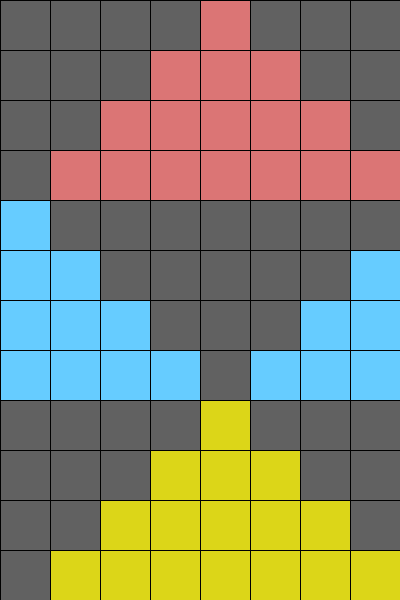

In [15]:
# Let's see what that looks like
# Not got the parsing right yet, so a bit of copy paste
pattern = "\n".join(["a7, k1","k1, a5, k2","k2, a3, k3","k3, a1, k4","b3, k1, b4","b2, k3, b3","b1, k5, b2","k7, b1","c7, k1","k1, c5, k2","k2, c3, k3","k3, c1, k4"])
parsed = pyknit.parse_chart(pattern, legend=stitch_legend)
pyknit.plot_chart(parsed, lr_direction="rl", tb_direction="bt")
#print(pattern)

In [11]:
import math
instructions.extend(colourwork_instructions)
instructions.append("Continue knitting in main colour until hat reaches desired height")
radius = hat_circumference / (math.pi*2)
instructions.append(f"This is likely around {round(radius+.5)}{gauge.units} based on your hat circumference, but try it on!")
instructions.append("For a close-fitting beanie it should be tall enough to reach the top of your head.")

In [12]:
# make a crown
hat = pyknit.Hat()
crown_instructions = hat.crown_decreases(int(number_of_repeats/2), cast_on)
instructions.append("\nCrown:")
instructions.extend(crown_instructions)

In [13]:
# print complete pattern

print("Triangle Hat")
print("------------")
print()
for line in instructions:
    print(line)

Triangle Hat
------------

Cast on 112 stitches
Brim:
Rows 1-13: {k2 through the back loop, p2} repeat around (28 repeats total)
Rows 14-15: k112

Triangle 1:
Row 16: [a7, k1] repeat 14 times
Row 17: [k1, a5, k2] repeat 14 times
Row 18: [k2, a3, k3] repeat 14 times
Row 19: [k3, a1, k4] repeat 14 times

Triangle 2: 
Row 20: [b3, k1, b4] repeat 14 times
Row 21: [b2, k3, b3] repeat 14 times
Row 22: [b1, k5, b2] repeat 14 times
Row 22: [k7, b1] repeat 14 times

Triangle 3: 
Row 16: [c7, k1] repeat 14 times
Row 17: [k1, c5, k2] repeat 14 times
Row 18: [k2, c3, k3] repeat 14 times
Row 19: [k3, c1, k4] repeat 14 times
Continue knitting in main colour until hat reaches desired height
This is likely around 4in based on your hat circumference, but try it on!
For a close-fitting beanie it should be tall enough to reach the top of your head.

Crown:
[k14, k2tog] repeat 7 times (105 stitches)
Knit 1 round
[k13, k2tog] repeat 7 times (98 stitches)
Knit 1 round
[k12, k2tog] repeat 7 times (91 stitche